# Customer Churn Prediction - Exploratory Data Analysis (EDA)

**Project**: Telco Customer Churn Prediction & Retention Strategy  
**Date**: October 2, 2025  
**Objective**: Understand data patterns, distributions, and relationships to inform modeling decisions

---

## Table of Contents
1. [Setup & Data Loading](#setup)
2. [Data Overview](#overview)
3. [Target Variable Analysis](#target)
4. [Numerical Features Analysis](#numerical)
5. [Categorical Features Analysis](#categorical)
6. [Churn Analysis by Feature](#churn-analysis)
7. [Correlation Analysis](#correlation)
8. [Key Insights & Recommendations](#insights)

---
## 1. Setup & Data Loading <a id='setup'></a>

In [2]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Create figures directory if it doesn't exist
os.makedirs('../reports/figures', exist_ok=True)

# Configure visualization settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the raw dataset
df = pd.read_csv('../data/raw/Telco-Customer-Churn.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset loaded successfully!
Shape: 7043 rows × 21 columns


---
## 2. Data Overview <a id='overview'></a>

In [5]:
# Display first few rows
print("\n=== FIRST 5 ROWS ===")
df.head()


=== FIRST 5 ROWS ===


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Dataset information
print("\n=== DATASET INFO ===")
df.info()


=== DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [7]:
# Basic statistics for numerical features
print("\n=== NUMERICAL FEATURES STATISTICS ===")
df.describe()


=== NUMERICAL FEATURES STATISTICS ===


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Check for missing values
print("\n=== MISSING VALUES ===")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


=== MISSING VALUES ===
No missing values found!


In [9]:
# Check for duplicate rows
print(f"\n=== DUPLICATE ROWS ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for duplicate customer IDs
duplicate_ids = df['customerID'].duplicated().sum()
print(f"Number of duplicate customer IDs: {duplicate_ids}")


=== DUPLICATE ROWS ===
Number of duplicate rows: 0
Number of duplicate customer IDs: 0


In [10]:
# Identify feature types
print("\n=== FEATURE TYPES ===")

# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'customerID' in numerical_features:
    numerical_features.remove('customerID')

# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
if 'customerID' in categorical_features:
    categorical_features.remove('customerID')
if 'Churn' in categorical_features:
    categorical_features.remove('Churn')

print(f"\nNumerical Features ({len(numerical_features)}):")
print(numerical_features)

print(f"\nCategorical Features ({len(categorical_features)}):")
print(categorical_features)

print(f"\nTarget Variable: Churn")


=== FEATURE TYPES ===

Numerical Features (3):
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Categorical Features (16):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

Target Variable: Churn


---
## 3. Data Preprocessing & Saving <a id='preprocessing'></a>

Now that we've completed our analysis, let's prepare the data for modeling by:
1. Cleaning the data (handling missing values, data types)
2. Splitting into train/validation/test sets
3. Saving processed data for model experiments

In [11]:
# Import data preprocessing functions
import sys
sys.path.append('..')
from src.data_loader import clean_data, split_data, save_processed_data

print("Data preprocessing functions loaded successfully!")

Data preprocessing functions loaded successfully!


### Step 1: Clean the Data

In [12]:
# Clean the data
df_clean = clean_data(df)

print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_clean.shape}")
print(f"\nMissing values after cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

2025-10-02 18:17:20,296 - src.data_loader - INFO - Cleaning data
2025-10-02 18:17:20,301 - src.data_loader - INFO - Cleaned TotalCharges column, filled 11 missing values
2025-10-02 18:17:20,330 - src.data_loader - INFO - Data cleaning completed


Original data shape: (7043, 21)
Cleaned data shape: (7043, 21)

Missing values after cleaning:
Series([], dtype: int64)


### Step 2: Split into Train/Val/Test Sets

We'll use stratified splits to maintain the class distribution across all sets:
- **Train**: 70% (for model training)
- **Validation**: 10% (for hyperparameter tuning)
- **Test**: 20% (for final evaluation)

In [13]:
# Split the data
X_train, X_val, X_test, y_train, y_val, y_test = split_data(
    df_clean, 
    target_col='Churn',
    test_size=0.2,
    val_size=0.1,
    random_state=42
)

# Combine features and target for saving
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

print("Data split summary:")
print(f"  Train: {len(train_data)} samples ({len(train_data)/len(df_clean)*100:.1f}%)")
print(f"  Val:   {len(val_data)} samples ({len(val_data)/len(df_clean)*100:.1f}%)")
print(f"  Test:  {len(test_data)} samples ({len(test_data)/len(df_clean)*100:.1f}%)")
print(f"\nChurn distribution:")
print(f"  Train: {y_train.value_counts(normalize=True)['Yes']*100:.2f}% churn")
print(f"  Val:   {y_val.value_counts(normalize=True)['Yes']*100:.2f}% churn")
print(f"  Test:  {y_test.value_counts(normalize=True)['Yes']*100:.2f}% churn")

2025-10-02 18:17:20,351 - src.data_loader - INFO - Splitting data: test_size=0.2, val_size=0.1
2025-10-02 18:17:20,356 - src.data_loader - INFO - Dropped customerID column
2025-10-02 18:17:20,369 - src.data_loader - INFO - Split sizes - Train: 4929, Val: 705, Test: 1409


Data split summary:
  Train: 4929 samples (70.0%)
  Val:   705 samples (10.0%)
  Test:  1409 samples (20.0%)

Churn distribution:
  Train: 26.54% churn
  Val:   26.52% churn
  Test:  26.54% churn


### Step 3: Save Processed Data

Save the splits to disk for use in model training:

In [14]:
# Save processed data splits
save_processed_data(train_data, '../data/processed/train.csv')
save_processed_data(val_data, '../data/processed/val.csv')
save_processed_data(test_data, '../data/processed/test.csv')

print("✓ Successfully saved processed data:")
print(f"  - ../data/processed/train.csv")
print(f"  - ../data/processed/val.csv")
print(f"  - ../data/processed/test.csv")
print("\nData is now ready for model training in 02_model_experiments.ipynb!")

2025-10-02 18:17:20,383 - src.data_loader - INFO - Saving processed data to ..\data\processed\train.csv
2025-10-02 18:17:20,407 - src.data_loader - INFO - Successfully saved 4929 rows to ..\data\processed\train.csv
2025-10-02 18:17:20,408 - src.data_loader - INFO - Saving processed data to ..\data\processed\val.csv
2025-10-02 18:17:20,413 - src.data_loader - INFO - Successfully saved 705 rows to ..\data\processed\val.csv
2025-10-02 18:17:20,414 - src.data_loader - INFO - Saving processed data to ..\data\processed\test.csv
2025-10-02 18:17:20,420 - src.data_loader - INFO - Successfully saved 1409 rows to ..\data\processed\test.csv


✓ Successfully saved processed data:
  - ../data/processed/train.csv
  - ../data/processed/val.csv
  - ../data/processed/test.csv

Data is now ready for model training in 02_model_experiments.ipynb!


---
## 4. Target Variable Analysis <a id='target'></a>

=== CHURN DISTRIBUTION ===
       Count  Percentage
Churn                   
No      5174   73.463013
Yes     1869   26.536987


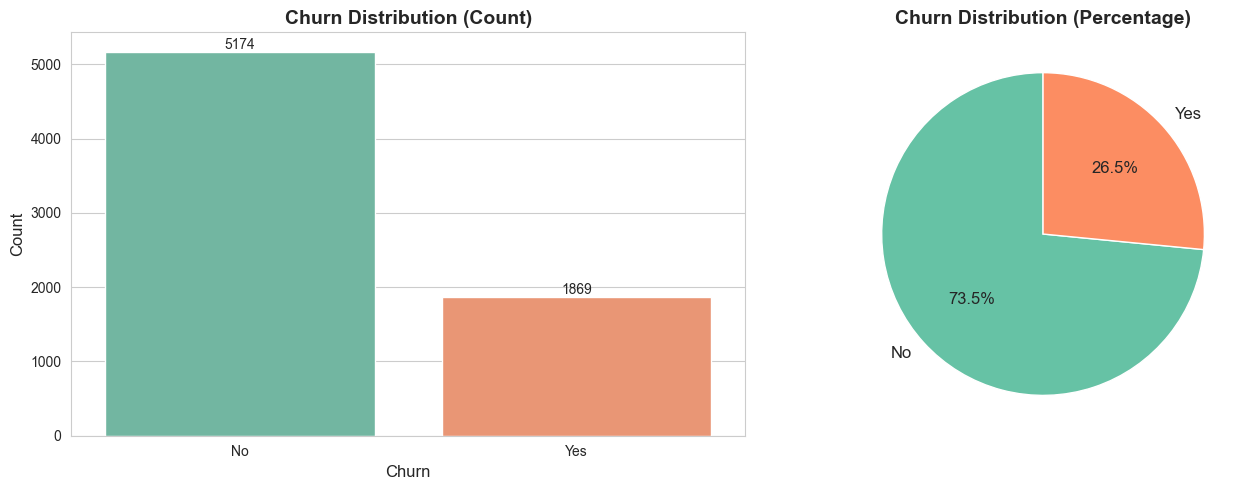


⚠️  Class Imbalance Detected: 26.54% churn rate
Recommendation: Use stratified sampling and consider class weighting in models.


In [15]:
# Churn distribution
print("=== CHURN DISTRIBUTION ===")
churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

churn_summary = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percent
})
print(churn_summary)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='Churn', palette='Set2', ax=axes[0])
axes[0].set_title('Churn Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Churn', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
for container in axes[0].containers:
    axes[0].bar_label(container)

# Pie chart
colors = sns.color_palette('Set2', n_colors=2)
axes[1].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
           startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title('Churn Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/churn_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n⚠️  Class Imbalance Detected: {churn_percent['Yes']:.2f}% churn rate")
print("Recommendation: Use stratified sampling and consider class weighting in models.")

---
## 5. Numerical Features Analysis <a id='numerical'></a>

In [16]:
# Fix TotalCharges if it's stored as string
if df['TotalCharges'].dtype == 'object':
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(f"Converted TotalCharges to numeric. Missing values created: {df['TotalCharges'].isnull().sum()}")

# Update numerical features list
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

Converted TotalCharges to numeric. Missing values created: 11


=== NUMERICAL FEATURES DISTRIBUTION ===


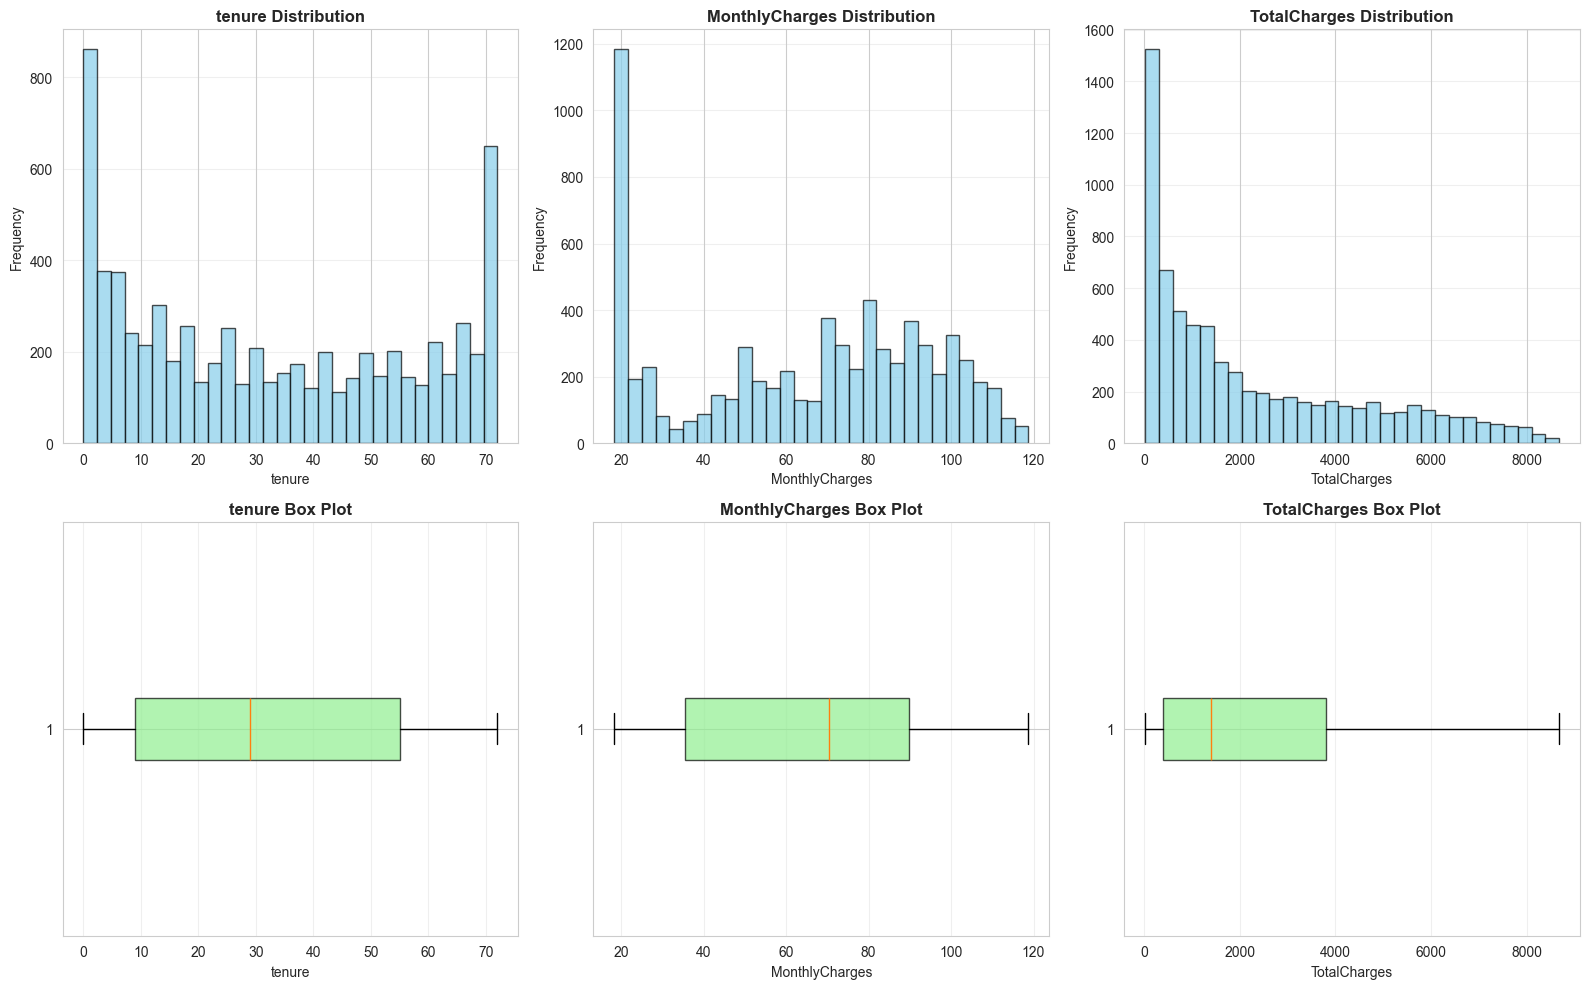

In [17]:
# Distribution of numerical features
print("=== NUMERICAL FEATURES DISTRIBUTION ===")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram
    axes[i].hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)
    
    # Box plot
    axes[i+3].boxplot(df[feature].dropna(), vert=False, patch_artist=True,
                     boxprops=dict(facecolor='lightgreen', alpha=0.7))
    axes[i+3].set_title(f'{feature} Box Plot', fontsize=12, fontweight='bold')
    axes[i+3].set_xlabel(feature, fontsize=10)
    axes[i+3].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


=== NUMERICAL FEATURES BY CHURN STATUS ===


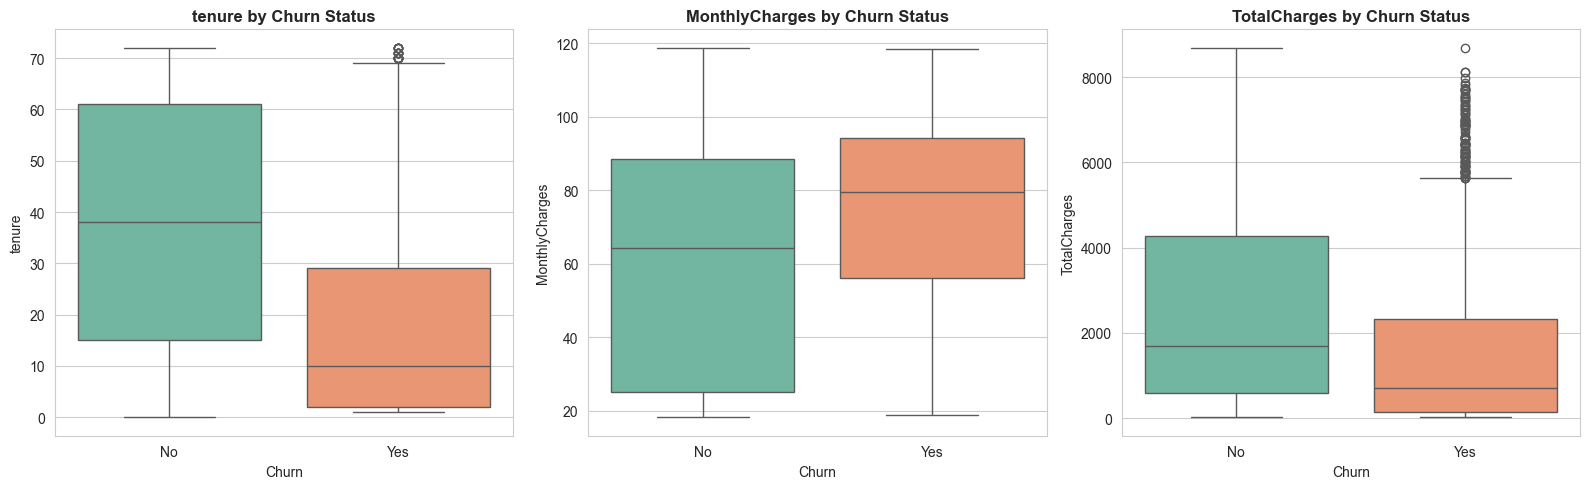


Mean values by Churn status:
          tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2555.344141
Yes    17.979133       74.441332   1531.796094


In [18]:
# Numerical features by churn status
print("\n=== NUMERICAL FEATURES BY CHURN STATUS ===")

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df, x='Churn', y=feature, palette='Set2', ax=axes[i])
    axes[i].set_title(f'{feature} by Churn Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Churn', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.savefig('../reports/figures/numerical_by_churn.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary by churn
print("\nMean values by Churn status:")
print(df.groupby('Churn')[numerical_features].mean())


=== TENURE ANALYSIS ===
  Tenure Group  Churn Rate (%)
0     0-1 year       47.678161
1    1-2 years       28.710938
2    2-4 years       20.388959
3     4+ years        9.513176


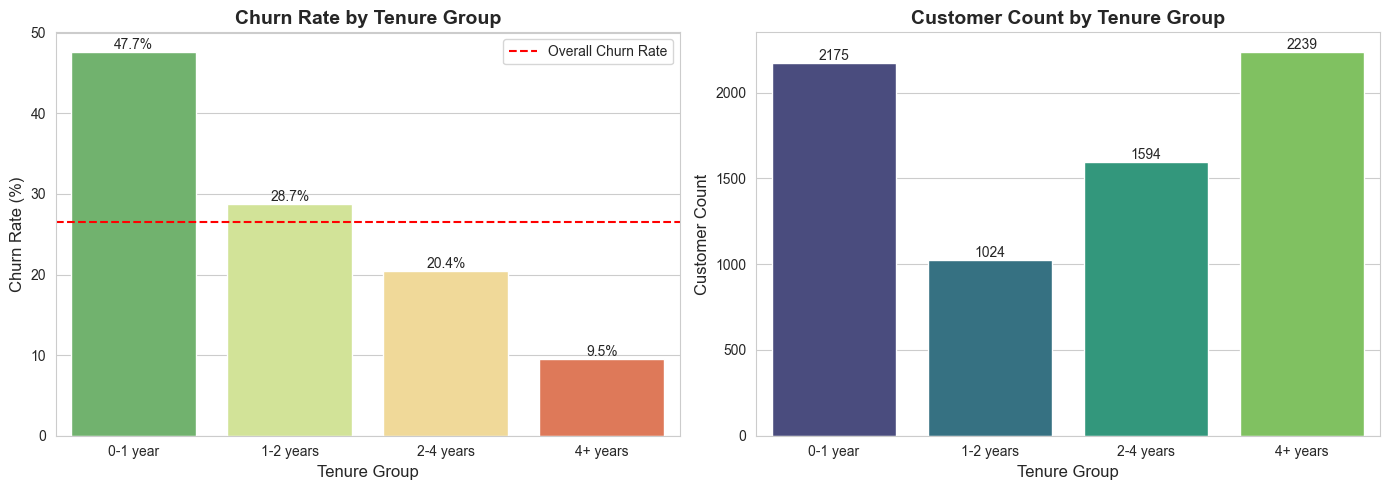


📊 Key Insight: Churn rate is highest for new customers (0-1 year tenure)


In [19]:
# Tenure analysis (key predictor for churn)
print("\n=== TENURE ANALYSIS ===")

# Create tenure groups
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72],
                            labels=['0-1 year', '1-2 years', '2-4 years', '4+ years'])

# Churn rate by tenure group
tenure_churn = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()
tenure_churn.columns = ['Tenure Group', 'Churn Rate (%)']

print(tenure_churn)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate by tenure group
sns.barplot(data=tenure_churn, x='Tenure Group', y='Churn Rate (%)', 
           palette='RdYlGn_r', ax=axes[0])
axes[0].set_title('Churn Rate by Tenure Group', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure Group', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].axhline(y=df['Churn'].value_counts(normalize=True)['Yes']*100, 
               color='red', linestyle='--', label='Overall Churn Rate')
axes[0].legend()
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%')

# Customer count by tenure group
tenure_counts = df['tenure_group'].value_counts().sort_index()
sns.barplot(x=tenure_counts.index, y=tenure_counts.values, palette='viridis', ax=axes[1])
axes[1].set_title('Customer Count by Tenure Group', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Group', fontsize=12)
axes[1].set_ylabel('Customer Count', fontsize=12)
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.savefig('../reports/figures/tenure_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Insight: Churn rate is highest for new customers (0-1 year tenure)")

---
## 6. Categorical Features Analysis <a id='categorical'></a>

In [20]:
# Overview of categorical features
print("=== CATEGORICAL FEATURES OVERVIEW ===")
print(f"\nTotal categorical features: {len(categorical_features)}")
print(f"Features: {categorical_features}")

=== CATEGORICAL FEATURES OVERVIEW ===

Total categorical features: 16
Features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']


2025-10-02 18:17:23,359 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-02 18:17:23,364 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.



=== KEY CATEGORICAL FEATURES DISTRIBUTION ===


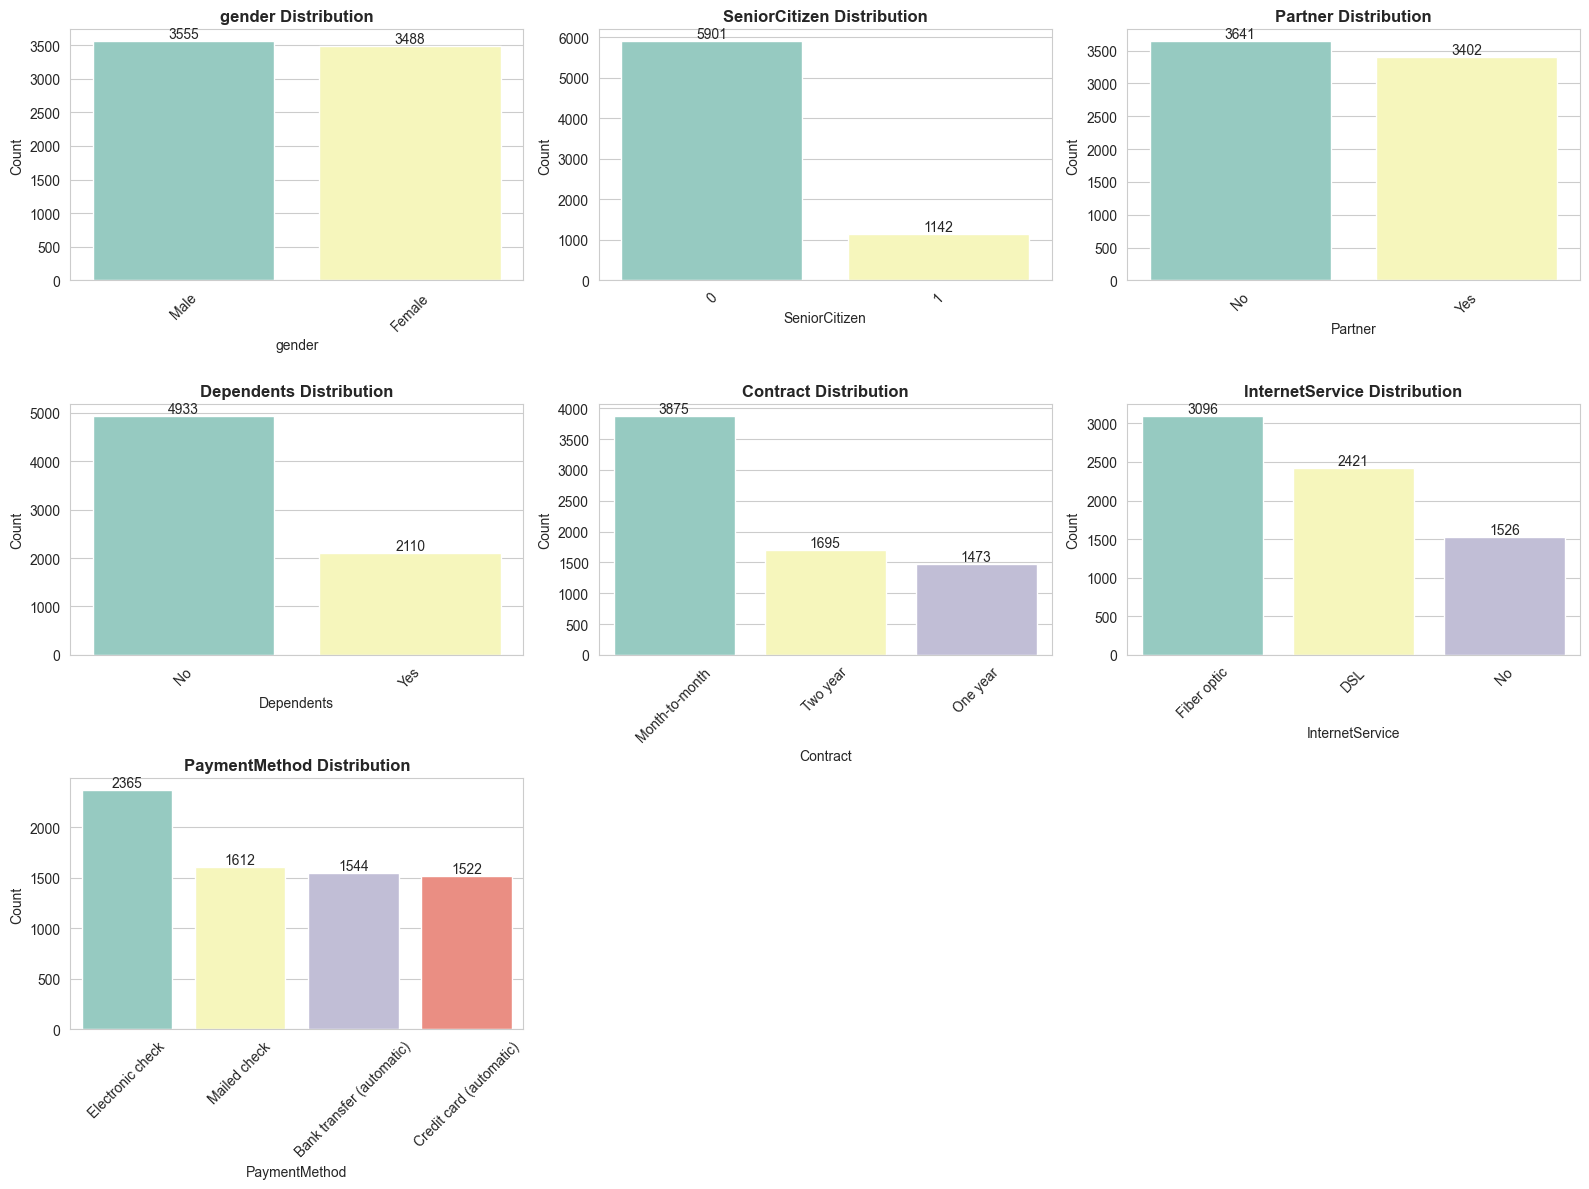

In [21]:
# Distribution of key categorical features
key_categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                  'Contract', 'InternetService', 'PaymentMethod']

print("\n=== KEY CATEGORICAL FEATURES DISTRIBUTION ===")

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(key_categorical):
    value_counts = df[feature].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, 
               palette='Set3', ax=axes[i])
    axes[i].set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    for container in axes[i].containers:
        axes[i].bar_label(container)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


=== SERVICE ADOPTION ANALYSIS ===
            Service  Adoption Rate (%)
0      PhoneService          90.316626
7   StreamingMovies          38.790288
6       StreamingTV          38.435326
3      OnlineBackup          34.488144
4  DeviceProtection          34.388755
5       TechSupport          29.021724
2    OnlineSecurity          28.666761
1   InternetService           0.000000


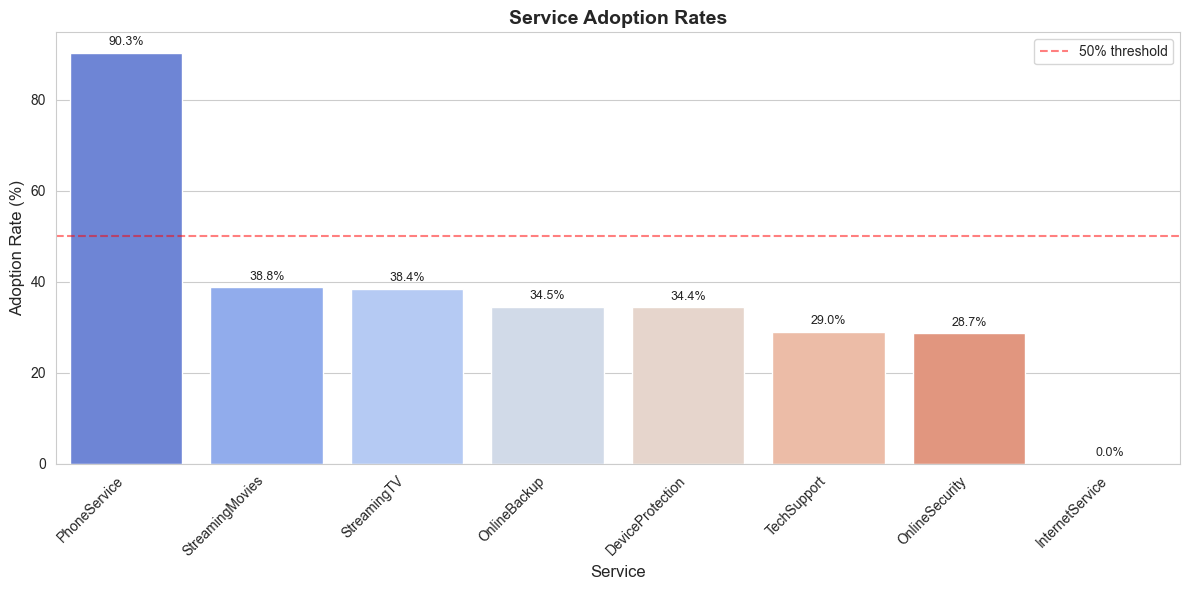

In [22]:
# Service adoption analysis
print("\n=== SERVICE ADOPTION ANALYSIS ===")

service_features = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies']

# Calculate adoption rates
adoption_data = []
for service in service_features:
    total = len(df)
    adopted = (df[service] == 'Yes').sum() if 'Yes' in df[service].values else 0
    adoption_rate = (adopted / total) * 100
    adoption_data.append({'Service': service, 'Adoption Rate (%)': adoption_rate})

adoption_df = pd.DataFrame(adoption_data).sort_values('Adoption Rate (%)', ascending=False)
print(adoption_df)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(data=adoption_df, x='Service', y='Adoption Rate (%)', palette='coolwarm')
plt.title('Service Adoption Rates', fontsize=14, fontweight='bold')
plt.xlabel('Service', fontsize=12)
plt.ylabel('Adoption Rate (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
for i, v in enumerate(adoption_df['Adoption Rate (%)']):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('../reports/figures/service_adoption.png', dpi=300, bbox_inches='tight')
plt.show()

---
## 7. Churn Analysis by Feature <a id='churn-analysis'></a>

In [23]:
# Function to calculate churn rate for categorical features
def calculate_churn_rate(df, feature):
    churn_rate = df.groupby(feature)['Churn'].apply(
        lambda x: (x == 'Yes').sum() / len(x) * 100
    ).reset_index()
    churn_rate.columns = [feature, 'Churn Rate (%)']
    churn_rate = churn_rate.sort_values('Churn Rate (%)', ascending=False)
    return churn_rate

2025-10-02 18:17:25,549 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-10-02 18:17:25,554 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


=== CHURN RATE BY KEY FEATURES ===


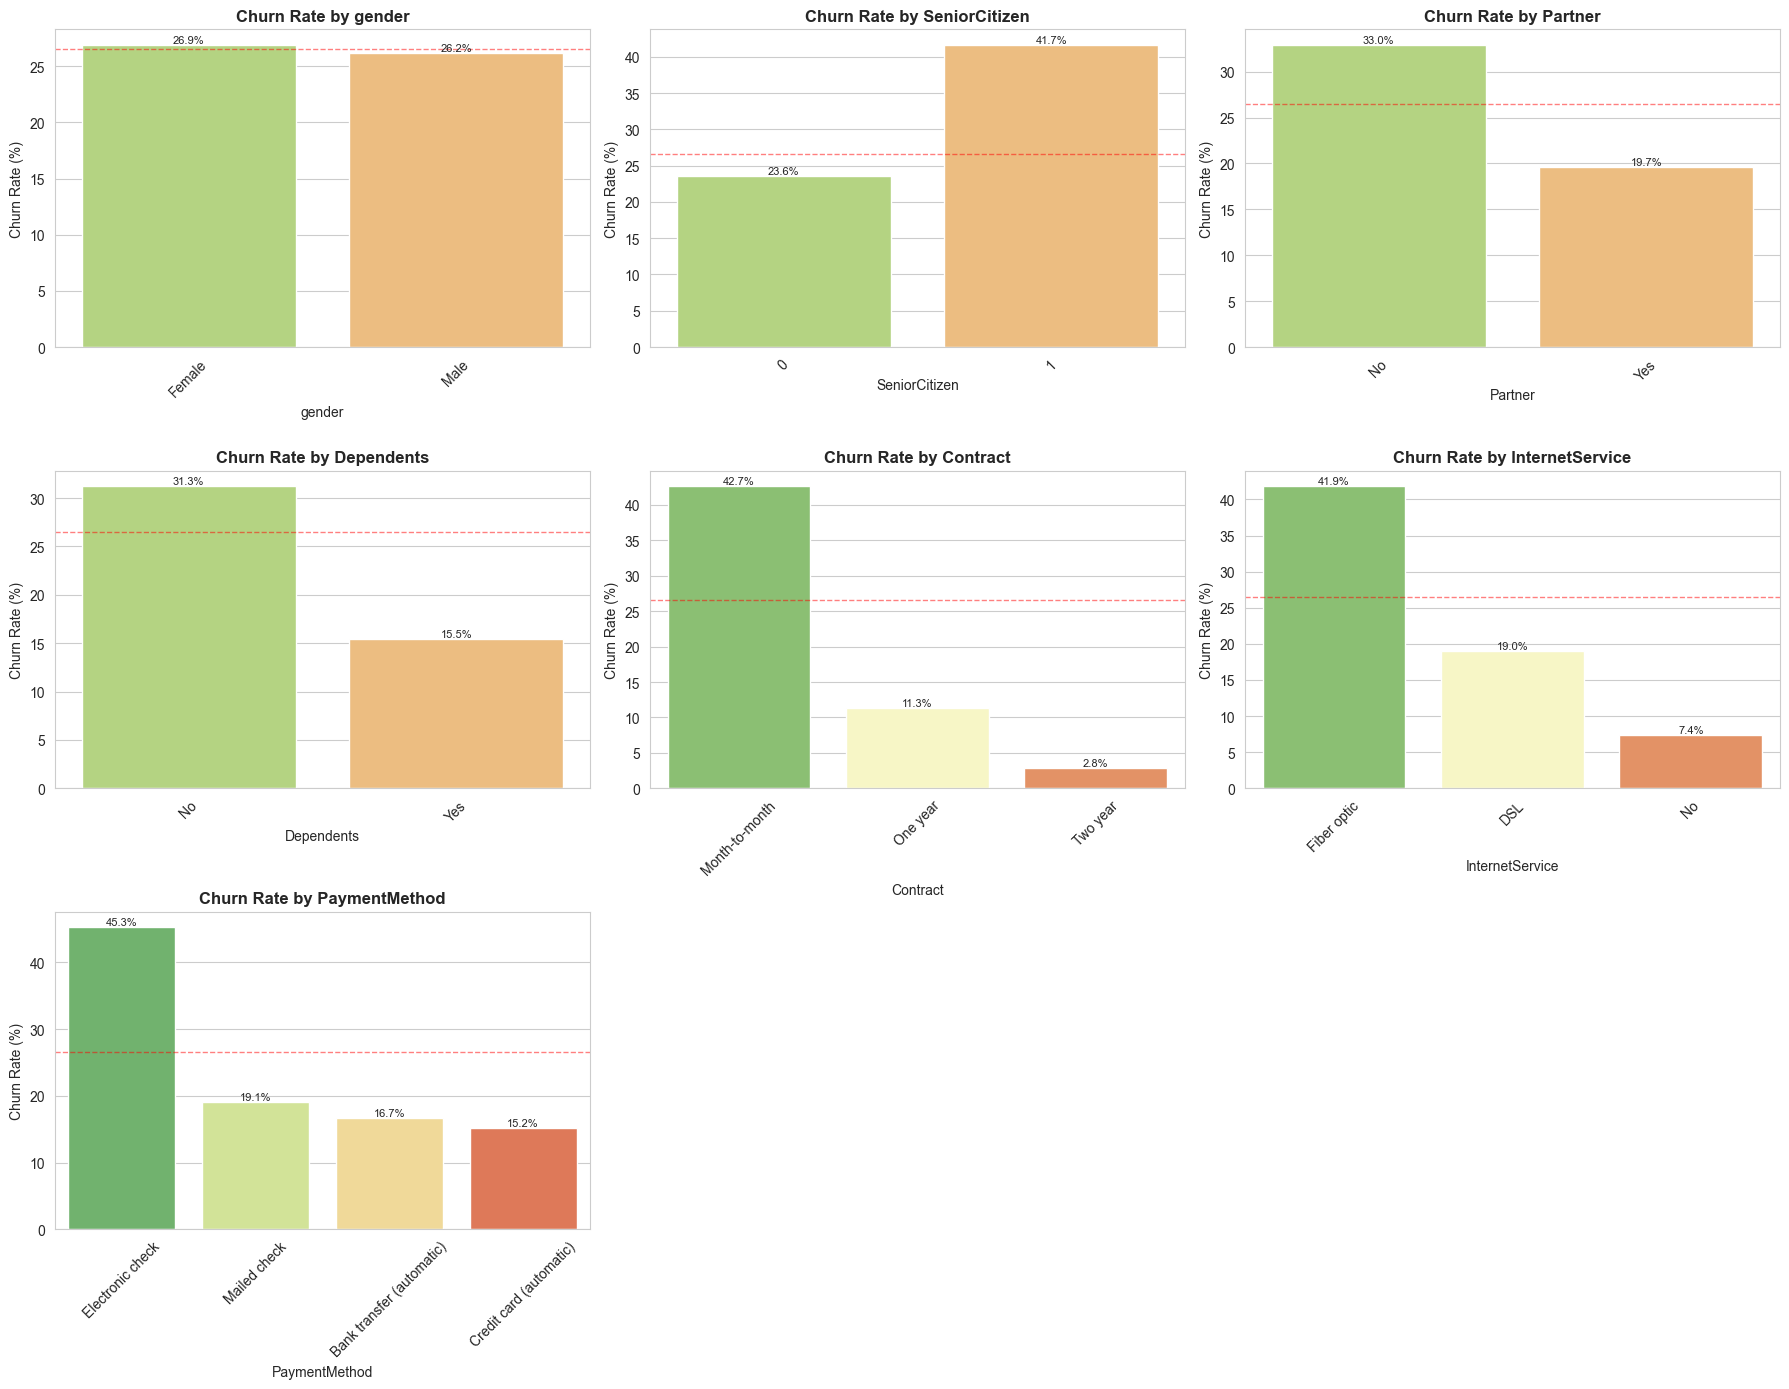

In [24]:
# Churn rate by key categorical features
print("=== CHURN RATE BY KEY FEATURES ===")

fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.ravel()

for i, feature in enumerate(key_categorical):
    churn_rate = calculate_churn_rate(df, feature)
    
    sns.barplot(data=churn_rate, x=feature, y='Churn Rate (%)', 
               palette='RdYlGn_r', ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Churn Rate (%)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].axhline(y=df['Churn'].value_counts(normalize=True)['Yes']*100,
                   color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', fontsize=8)

# Hide unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('../reports/figures/churn_by_features.png', dpi=300, bbox_inches='tight')
plt.show()


=== CONTRACT TYPE ANALYSIS ===

Churn Rate by Contract Type:
         Contract  Churn Rate (%)
0  Month-to-month       42.709677
1        One year       11.269518
2        Two year        2.831858


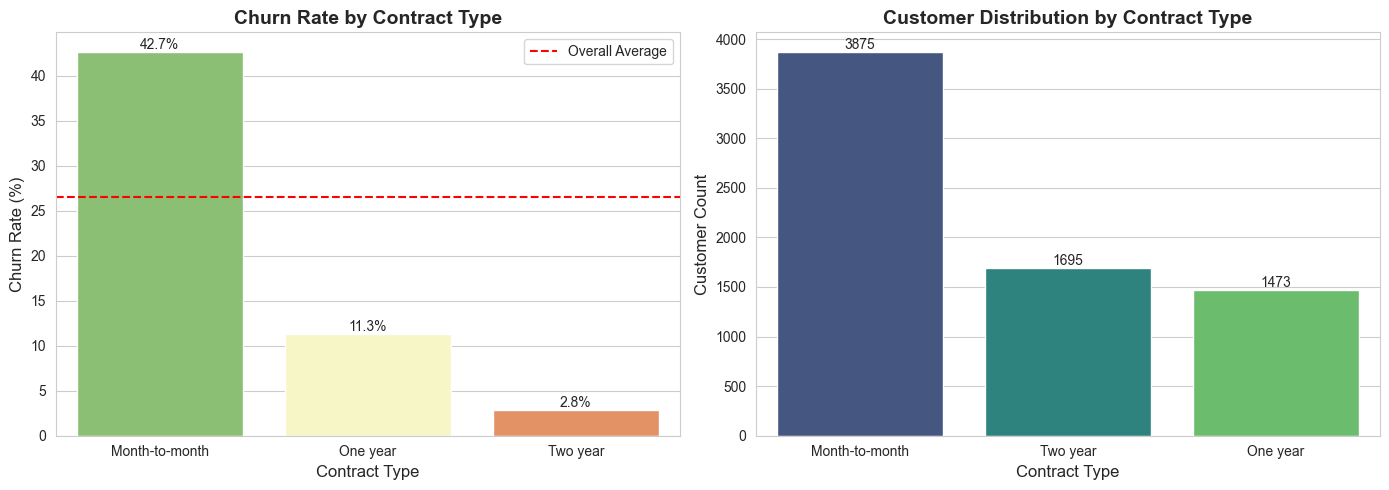


📊 Key Insight: Month-to-month contracts have significantly higher churn rates!


In [25]:
# Contract type analysis (critical feature)
print("\n=== CONTRACT TYPE ANALYSIS ===")

contract_churn = calculate_churn_rate(df, 'Contract')
print("\nChurn Rate by Contract Type:")
print(contract_churn)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Churn rate
sns.barplot(data=contract_churn, x='Contract', y='Churn Rate (%)', 
           palette='RdYlGn_r', ax=axes[0])
axes[0].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Contract Type', fontsize=12)
axes[0].set_ylabel('Churn Rate (%)', fontsize=12)
axes[0].axhline(y=df['Churn'].value_counts(normalize=True)['Yes']*100,
               color='red', linestyle='--', label='Overall Average')
axes[0].legend()
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%')

# Customer distribution
contract_dist = df['Contract'].value_counts()
sns.barplot(x=contract_dist.index, y=contract_dist.values, palette='viridis', ax=axes[1])
axes[1].set_title('Customer Distribution by Contract Type', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Contract Type', fontsize=12)
axes[1].set_ylabel('Customer Count', fontsize=12)
for container in axes[1].containers:
    axes[1].bar_label(container)

plt.tight_layout()
plt.savefig('../reports/figures/contract_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Insight: Month-to-month contracts have significantly higher churn rates!")

---
## 8. Correlation Analysis <a id='correlation'></a>

Analyzing correlations between numerical features and their relationship with churn to:
- Identify multicollinearity issues
- Discover important predictive features
- Guide feature engineering decisions

=== CORRELATION MATRIX - NUMERICAL FEATURES ===

Correlation Matrix:
                tenure  MonthlyCharges  TotalCharges
tenure           1.000           0.248         0.826
MonthlyCharges   0.248           1.000         0.651
TotalCharges     0.826           0.651         1.000


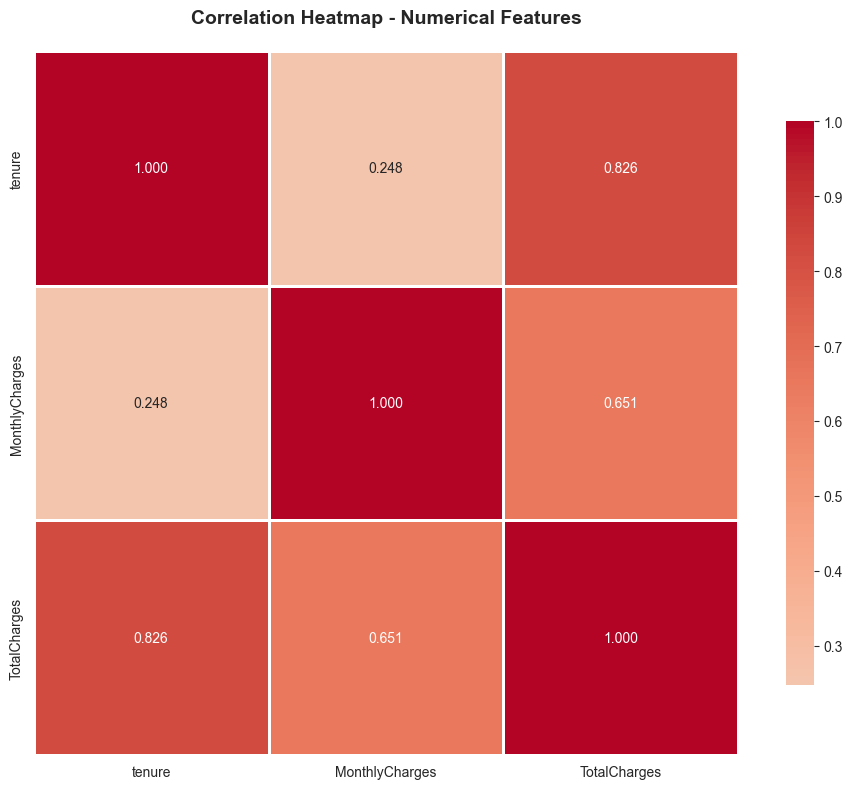


⚠️  High Correlations Detected (|r| > 0.7):
  Feature 1     Feature 2  Correlation
0    tenure  TotalCharges      0.82588

Recommendation: Consider removing one feature from highly correlated pairs to reduce multicollinearity.


In [26]:
# Correlation matrix for numerical features
print("=== CORRELATION MATRIX - NUMERICAL FEATURES ===\n")

# Select only numerical features
numerical_data = df[numerical_features].copy()

# Calculate correlation matrix
corr_matrix = numerical_data.corr()

print("Correlation Matrix:")
print(corr_matrix.round(3))

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Numerical Features', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../reports/figures/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify high correlations (excluding diagonal)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature 1': corr_matrix.columns[i],
                'Feature 2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })

if high_corr_pairs:
    print("\n⚠️  High Correlations Detected (|r| > 0.7):")
    high_corr_df = pd.DataFrame(high_corr_pairs)
    print(high_corr_df)
    print("\nRecommendation: Consider removing one feature from highly correlated pairs to reduce multicollinearity.")
else:
    print("\n✓ No strong multicollinearity detected (all |r| < 0.7)")


=== CORRELATION WITH TARGET VARIABLE (CHURN) ===

          Feature  Correlation with Churn
0          tenure               -0.352229
2    TotalCharges               -0.199484
1  MonthlyCharges                0.193356


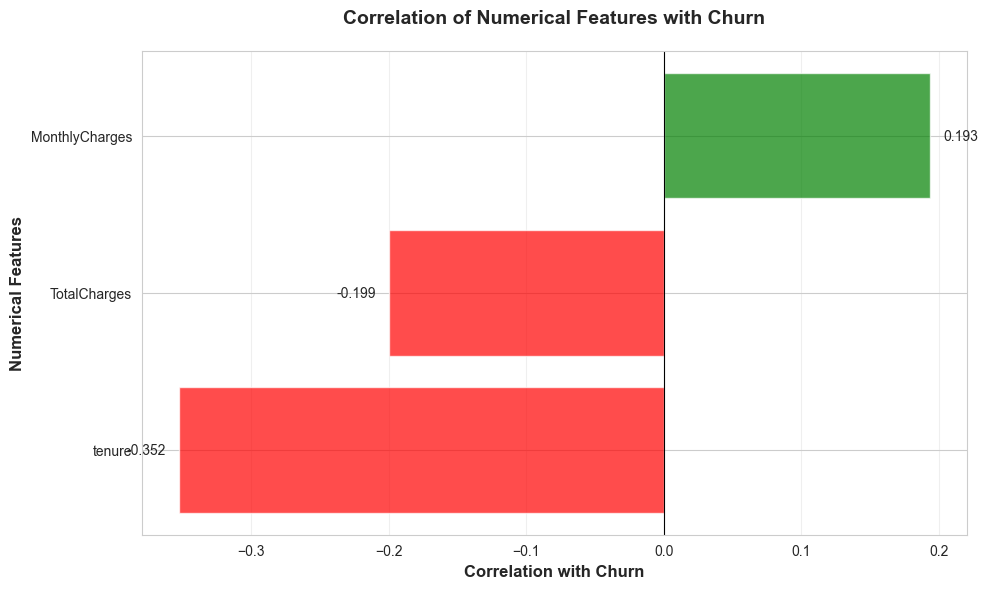


📊 Key Insights:
   - Strongest positive correlation: tenure (-0.352)
   - Strongest negative correlation: MonthlyCharges (0.193)

   Interpretation:
   • Positive correlation: Higher values → Higher churn probability
   • Negative correlation: Higher values → Lower churn probability


In [27]:
# Correlation with target variable (Churn)
print("\n=== CORRELATION WITH TARGET VARIABLE (CHURN) ===\n")

# Convert Churn to binary for correlation calculation
df_corr = df.copy()
df_corr['Churn_Binary'] = (df_corr['Churn'] == 'Yes').astype(int)

# Calculate point-biserial correlation (numerical vs binary)
target_correlations = []
for feature in numerical_features:
    # Remove NaN values for correlation calculation
    valid_data = df_corr[[feature, 'Churn_Binary']].dropna()
    corr = valid_data[feature].corr(valid_data['Churn_Binary'])
    target_correlations.append({
        'Feature': feature,
        'Correlation with Churn': corr,
        'Abs Correlation': abs(corr)
    })

target_corr_df = pd.DataFrame(target_correlations).sort_values('Abs Correlation', ascending=False)
print(target_corr_df[['Feature', 'Correlation with Churn']])

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr_df['Correlation with Churn']]
bars = plt.barh(target_corr_df['Feature'], target_corr_df['Correlation with Churn'], color=colors, alpha=0.7)
plt.xlabel('Correlation with Churn', fontsize=12, fontweight='bold')
plt.ylabel('Numerical Features', fontsize=12, fontweight='bold')
plt.title('Correlation of Numerical Features with Churn', fontsize=14, fontweight='bold', pad=20)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, target_corr_df['Correlation with Churn'])):
    plt.text(val + 0.01 if val > 0 else val - 0.01, i, f'{val:.3f}', 
             va='center', ha='left' if val > 0 else 'right', fontsize=10)

plt.tight_layout()
plt.savefig('../reports/figures/correlation_with_churn.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Key Insights:")
print(f"   - Strongest positive correlation: {target_corr_df.iloc[0]['Feature']} ({target_corr_df.iloc[0]['Correlation with Churn']:.3f})")
print(f"   - Strongest negative correlation: {target_corr_df.iloc[-1]['Feature']} ({target_corr_df.iloc[-1]['Correlation with Churn']:.3f})")
print("\n   Interpretation:")
print("   • Positive correlation: Higher values → Higher churn probability")
print("   • Negative correlation: Higher values → Lower churn probability")


=== VARIANCE INFLATION FACTOR (VIF) ANALYSIS ===

VIF measures how much a feature's variance is inflated due to multicollinearity
Rule of thumb: VIF > 10 indicates problematic multicollinearity

          Feature       VIF
2    TotalCharges  8.079181
0          tenure  6.332432
1  MonthlyCharges  3.361075


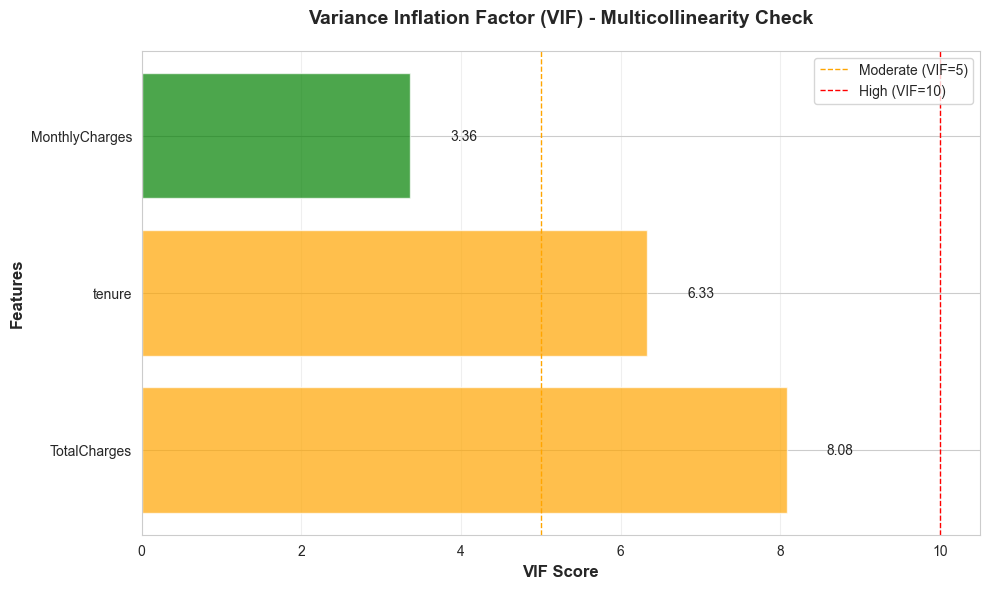


✓ No severe multicollinearity issues detected


In [28]:
# Variance Inflation Factor (VIF) for multicollinearity detection
print("\n=== VARIANCE INFLATION FACTOR (VIF) ANALYSIS ===\n")
print("VIF measures how much a feature's variance is inflated due to multicollinearity")
print("Rule of thumb: VIF > 10 indicates problematic multicollinearity\n")

try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    # Prepare data (remove NaN values)
    vif_data = df[numerical_features].dropna()
    
    # Calculate VIF for each feature
    vif_results = []
    for i, feature in enumerate(numerical_features):
        vif = variance_inflation_factor(vif_data.values, i)
        vif_results.append({
            'Feature': feature,
            'VIF': vif
        })
    
    vif_df = pd.DataFrame(vif_results).sort_values('VIF', ascending=False)
    print(vif_df)
    
    # Visualize VIF
    plt.figure(figsize=(10, 6))
    colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_df['VIF']]
    bars = plt.barh(vif_df['Feature'], vif_df['VIF'], color=colors, alpha=0.7)
    plt.xlabel('VIF Score', fontsize=12, fontweight='bold')
    plt.ylabel('Features', fontsize=12, fontweight='bold')
    plt.title('Variance Inflation Factor (VIF) - Multicollinearity Check', fontsize=14, fontweight='bold', pad=20)
    plt.axvline(x=5, color='orange', linestyle='--', linewidth=1, label='Moderate (VIF=5)')
    plt.axvline(x=10, color='red', linestyle='--', linewidth=1, label='High (VIF=10)')
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for bar, val in zip(bars, vif_df['VIF']):
        plt.text(val + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.2f}', 
                va='center', ha='left', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/vif_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Interpretation
    high_vif = vif_df[vif_df['VIF'] > 10]
    if len(high_vif) > 0:
        print(f"\n⚠️  High VIF detected for: {', '.join(high_vif['Feature'].tolist())}")
        print("   Recommendation: Consider removing or combining these features")
    else:
        print("\n✓ No severe multicollinearity issues detected")
        
except ImportError:
    print("⚠️  statsmodels not installed. Installing...")
    print("   Run: pip install statsmodels")
    print("   Then re-run this cell for VIF analysis")

In [29]:
# Summary of correlation analysis findings
print("\n" + "="*80)
print(" "*25 + "CORRELATION ANALYSIS SUMMARY")
print("="*80)

print("\n1. FEATURE-TO-FEATURE CORRELATIONS:")
print("   Examining relationships between numerical features...")

# Get top 3 strongest correlations (excluding diagonal)
all_corrs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        all_corrs.append({
            'Pair': f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}",
            'Correlation': corr_matrix.iloc[i, j]
        })

if all_corrs:
    top_corrs = sorted(all_corrs, key=lambda x: abs(x['Correlation']), reverse=True)[:3]
    for idx, item in enumerate(top_corrs, 1):
        print(f"   {idx}. {item['Pair']}: r = {item['Correlation']:.3f}")

print("\n2. FEATURE-TO-TARGET CORRELATIONS:")
print("   Impact of numerical features on churn probability...")
for idx, row in target_corr_df.iterrows():
    direction = "increases" if row['Correlation with Churn'] > 0 else "decreases"
    print(f"   • {row['Feature']}: r = {row['Correlation with Churn']:.3f} ({direction} churn risk)")

print("\n3. MULTICOLLINEARITY ASSESSMENT:")
try:
    max_vif = vif_df['VIF'].max()
    max_vif_feature = vif_df.loc[vif_df['VIF'].idxmax(), 'Feature']
    
    if max_vif > 10:
        print(f"   ⚠️  CAUTION: {max_vif_feature} has VIF = {max_vif:.2f}")
        print("   Action: Consider feature selection or regularization")
    elif max_vif > 5:
        print(f"   ⚠️  MODERATE: {max_vif_feature} has VIF = {max_vif:.2f}")
        print("   Action: Monitor during model training")
    else:
        print(f"   ✓ GOOD: Max VIF = {max_vif:.2f} (all features < 5)")
        print("   Action: Safe to use all features")
except:
    print("   ℹ️  VIF analysis skipped (statsmodels required)")

print("\n4. MODELING RECOMMENDATIONS:")
print("   Based on correlation analysis:")
print("   • Prioritize features with |r| > 0.1 for feature importance")
print("   • Apply feature scaling (StandardScaler) for gradient-based models")
print("   • Consider polynomial features for weak linear relationships")
print("   • Use regularization (L1/L2) if multicollinearity exists")

print("\n" + "="*80)


                         CORRELATION ANALYSIS SUMMARY

1. FEATURE-TO-FEATURE CORRELATIONS:
   Examining relationships between numerical features...
   1. tenure ↔ TotalCharges: r = 0.826
   2. MonthlyCharges ↔ TotalCharges: r = 0.651
   3. tenure ↔ MonthlyCharges: r = 0.248

2. FEATURE-TO-TARGET CORRELATIONS:
   Impact of numerical features on churn probability...
   • tenure: r = -0.352 (decreases churn risk)
   • TotalCharges: r = -0.199 (decreases churn risk)
   • MonthlyCharges: r = 0.193 (increases churn risk)

3. MULTICOLLINEARITY ASSESSMENT:
   ⚠️  MODERATE: TotalCharges has VIF = 8.08
   Action: Monitor during model training

4. MODELING RECOMMENDATIONS:
   Based on correlation analysis:
   • Prioritize features with |r| > 0.1 for feature importance
   • Apply feature scaling (StandardScaler) for gradient-based models
   • Consider polynomial features for weak linear relationships
   • Use regularization (L1/L2) if multicollinearity exists



---
## 9. Key Insights & Recommendations <a id='insights'></a>

In [30]:
# Summary statistics
print("="*80)
print(" "*25 + "KEY INSIGHTS & RECOMMENDATIONS")
print("="*80)

# 1. Overall churn rate
churn_rate = (df['Churn'] == 'Yes').sum() / len(df) * 100
print(f"\n1. OVERALL CHURN RATE: {churn_rate:.2f}%")
print("   - Moderate class imbalance detected")
print("   - Recommendation: Use stratified sampling and class weighting")

# 2. Tenure insights
new_customer_churn = df[df['tenure'] <= 12]['Churn'].value_counts(normalize=True)['Yes'] * 100
old_customer_churn = df[df['tenure'] > 48]['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"\n2. TENURE INSIGHTS:")
print(f"   - New customers (≤1 year): {new_customer_churn:.2f}% churn rate")
print(f"   - Loyal customers (>4 years): {old_customer_churn:.2f}% churn rate")
print(f"   - Difference: {new_customer_churn - old_customer_churn:.2f} percentage points")
print("   - Recommendation: Focus retention efforts on first 12 months")

# 3. Contract insights
month_to_month_churn = df[df['Contract'] == 'Month-to-month']['Churn'].value_counts(normalize=True)['Yes'] * 100
two_year_churn = df[df['Contract'] == 'Two year']['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"\n3. CONTRACT INSIGHTS:")
print(f"   - Month-to-month: {month_to_month_churn:.2f}% churn rate")
print(f"   - Two year: {two_year_churn:.2f}% churn rate")
print(f"   - Difference: {month_to_month_churn - two_year_churn:.2f} percentage points")
print("   - Recommendation: Incentivize long-term contracts with discounts")

print("\n" + "="*80)

                         KEY INSIGHTS & RECOMMENDATIONS

1. OVERALL CHURN RATE: 26.54%
   - Moderate class imbalance detected
   - Recommendation: Use stratified sampling and class weighting

2. TENURE INSIGHTS:
   - New customers (≤1 year): 47.44% churn rate
   - Loyal customers (>4 years): 9.51% churn rate
   - Difference: 37.93 percentage points
   - Recommendation: Focus retention efforts on first 12 months

3. CONTRACT INSIGHTS:
   - Month-to-month: 42.71% churn rate
   - Two year: 2.83% churn rate
   - Difference: 39.88 percentage points
   - Recommendation: Incentivize long-term contracts with discounts

